# 1. Loading data from the csv file, exploring the data

In [1]:
# Import basic modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

In [44]:
# You can change the path to where you've stored the data in your local machine
data = pd.read_csv(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\rawdata.csv')

In [3]:
data.head()

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,...,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,...,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,...,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,...,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,...,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,...,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I


In [45]:
# Check the total no. of records/columns, unique records etc
print("Number of records in the dataset : ",data.shape[0])
print("Number of columns in the dataset : ",data.shape[1])
print("Number of unique User IDs in data1 : ",data['user_id'].nunique())

Number of records in the dataset :  45222
Number of columns in the dataset :  21
Number of unique User IDs in data1 :  45222


### Check for data quality - Missing values

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               45222 non-null  object 
 1   gender                45222 non-null  object 
 2   date_of_birth         45222 non-null  object 
 3   workclass             45222 non-null  object 
 4   education_level       45222 non-null  object 
 5   education_num         45222 non-null  float64
 6   marital_status        45222 non-null  object 
 7   occupation            45222 non-null  object 
 8   relationship          45222 non-null  object 
 9   capital_gain          45222 non-null  float64
 10  capital_loss          45222 non-null  float64
 11  hours_per_week        45222 non-null  float64
 12  approved              45222 non-null  int64  
 13  address               45222 non-null  object 
 14  email                 45222 non-null  object 
 15  inquiry_purpose_cod

In [ ]:
"""
We see that inquiry_purpose_code has 1291 missing values, 
            asset_class_cd has 35730 missing values,
            asset_code has 82 missing values,
            portfolio_type has 6 missing values
            
Rest of the variables do not have a missing value
"""

In [46]:
# Since user_id is unique, set user_id as index of the data frame
data.set_index('user_id',inplace=True)

In [26]:
data.head(5)

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
user_id,,,,,,,,,,,,,,,,,,,,
307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I


# 2. Exploratory Data Analysis

### Analyzing Numeric & categorical Variables separately 

In [47]:
# extracting the list of numeric variables 
num_var = list(data.select_dtypes(exclude='object').columns)
num_var

['education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'approved',
 'inquiry_purpose_code',
 'account_type',
 'asset_code']

In [48]:
# extracting the list of categorical variables 
cat_var = list(data.select_dtypes(include='object').columns)
cat_var

['gender',
 'date_of_birth',
 'workclass',
 'education_level',
 'marital_status',
 'occupation',
 'relationship',
 'address',
 'email',
 'institute_type',
 'asset_class_cd',
 'portfolio_type']

In [49]:
for i in ['education_num', 'inquiry_purpose_code', 'account_type', 'asset_code']:
    num_var.remove(i)
    cat_var.append(i)
    data[i] = data[i].apply(str)

In [50]:
num_var , cat_var

(['capital_gain', 'capital_loss', 'hours_per_week', 'approved'],
 ['gender',
  'date_of_birth',
  'workclass',
  'education_level',
  'marital_status',
  'occupation',
  'relationship',
  'address',
  'email',
  'institute_type',
  'asset_class_cd',
  'portfolio_type',
  'education_num',
  'inquiry_purpose_code',
  'account_type',
  'asset_code'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 307c73a3-0c67-43b5-b0d1-62ad5f00b52a to 82eab6e5-57ab-4fd7-8923-e7790390c473
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                45222 non-null  object 
 1   date_of_birth         45222 non-null  object 
 2   workclass             45222 non-null  object 
 3   education_level       45222 non-null  object 
 4   education_num         45222 non-null  object 
 5   marital_status        45222 non-null  object 
 6   occupation            45222 non-null  object 
 7   relationship          45222 non-null  object 
 8   capital_gain          45222 non-null  float64
 9   capital_loss          45222 non-null  float64
 10  hours_per_week        45222 non-null  float64
 11  approved              45222 non-null  int64  
 12  address               45222 non-null  object 
 13  email                 45222 non-null  object 
 14  inquiry_p

### Basic Feature Engineering - Creating intuitive new features from the existing ones

In [51]:
# DOB is a date variable has to be converted to date
import datetime as dt

In [52]:
data['dob']  = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["date_of_birth"]]

In [53]:
# Calculate Age from DOB
now = pd.Timestamp('now')
data['dob'] = data['dob'].where(data['dob'] < now, data['dob'] -  np.timedelta64(100, 'Y'))
data['age'] = (now - data['dob']).astype('<m8[Y]')

data['Yr'] = data['dob'].dt.year
data['Mth'] = data['dob'].dt.month
data.head(5)

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,dob,age,Yr,Mth
user_id,,,,,,,,,,,,,,,,,,,,,
307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,...,7.0,PVT,5,NaN,1.0,R,1987-01-03,33.0,1987,1
519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,...,13.0,NBF,5,NaN,1.0,R,1970-01-07,50.0,1970,1
f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,...,13.0,NBF,5,NaN,1.0,R,1973-01-06,47.0,1973,1
91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,...,13.0,NBF,5,NaN,1.0,R,2001-12-30,18.0,2001,12
0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,...,13.0,PVT,47,S,1.0,I,1986-01-03,34.0,1986,1


In [54]:
data.drop(['date_of_birth','dob'], axis=1, inplace=True)

In [ ]:
"""
Email and Address are pretty much useless fields as they are - because these are highly personalized fields (evident
from the # unique values) & it is difficult to establish any correlation between these variables and the dependent variable

However, using regular expressions, let's extract as much info from Email and Address to see if someone's location or 
email domain etc can add value
"""

In [56]:
import re

In [58]:
df = data.copy()

In [163]:
def domext(x):
    return re.findall(r'@(\w+).',x)[0]

def domext1(x):
    return re.findall(r'@\w+.(\w+)',x)[0]

In [164]:
df['website'] = df['email'].apply(domext)
df['domain'] = df['email'].apply(domext1)

In [165]:
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,...,asset_code,portfolio_type,age,Yr,Mth,domain,website,zip,box_ind,suite_ind
user_id,,,,,,,,,,,,,,,,,,,,,
307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,...,1.0,R,33.0,1987,1,com,yahoo,83962,0,0
519481f1-604d-48b6-aa47-4123a982431a,Male,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,...,1.0,R,50.0,1970,1,com,hotmail,05193,0,0
f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,...,1.0,R,47.0,1973,1,com,gmail,56510,0,0
91360ed7-72d1-4f6e-b492-d71ef4480061,Female,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,...,1.0,R,18.0,2001,12,com,hotmail,51797,0,1
0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,...,1.0,I,34.0,1986,1,com,gmail,14128,0,0


In [151]:
df['zip'] = df['address'].apply(lambda x:re.findall(r'\d{5}$',x)[0])

In [115]:
df['box_ind'] = df['address'].apply(lambda x:min(1,len(re.findall(r'box',x.lower()))))
df['box_ind'] = df['box_ind'].apply(int)

In [116]:
df['suite_ind'] = df['address'].apply(lambda x:min(1,len(re.findall(r'suite',x.lower()))))
df['suite_ind'] = df['suite_ind'].apply(int)

In [123]:
df['box_ind'].sum()

3243

In [118]:
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,...,asset_code,portfolio_type,age,Yr,Mth,domain,website,zip,box_ind,suite_ind
user_id,,,,,,,,,,,,,,,,,,,,,
307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,...,1.0,R,33.0,1987,1,com,yahoo,[83962],0,0
519481f1-604d-48b6-aa47-4123a982431a,Male,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,...,1.0,R,50.0,1970,1,com,hotmail,[05193],0,0
f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,...,1.0,R,47.0,1973,1,com,gmail,[56510],0,0
91360ed7-72d1-4f6e-b492-d71ef4480061,Female,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,...,1.0,R,18.0,2001,12,com,hotmail,[51797],0,1
0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,...,1.0,I,34.0,1986,1,com,gmail,[14128],0,0


In [124]:
cat_var = list(df.select_dtypes(include='object').columns)
num_var = list(df.select_dtypes(exclude='object').columns)

### Categorical features exploration

In [152]:
for col in cat_var:
    print("# Unique values in the feature", col, ":", df[col].nunique())

# Unique values in the feature gender : 2
# Unique values in the feature workclass : 7
# Unique values in the feature education_level : 16
# Unique values in the feature education_num : 16
# Unique values in the feature marital_status : 7
# Unique values in the feature occupation : 14
# Unique values in the feature relationship : 6
# Unique values in the feature address : 45222
# Unique values in the feature email : 44300
# Unique values in the feature inquiry_purpose_code : 19
# Unique values in the feature institute_type : 10
# Unique values in the feature account_type : 37
# Unique values in the feature asset_class_cd : 8
# Unique values in the feature asset_code : 5
# Unique values in the feature portfolio_type : 4
# Unique values in the feature domain : 972
# Unique values in the feature website : 1003
# Unique values in the feature zip : 36371


In [153]:
def univarplots(dat, col):
    print("Univariate plot for ",col)
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=dat)
    plt.show()

In [154]:
def bivarplots(dat, col, target = "approved"):
    print("Bivariate plot for ",col, " with ", target)
    print("\n")
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=dat, hue=target)
#     sns.barplot(x=col, y=df['approved'].mean(), data=dat)
    plt.show()

Univariate plot for  gender


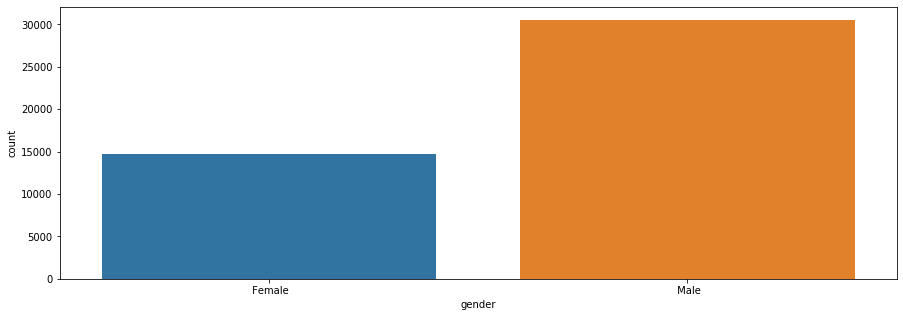

Univariate plot for  workclass


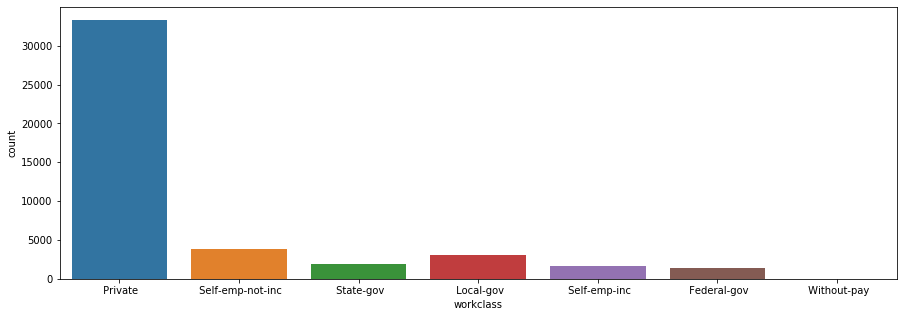

Univariate plot for  education_level


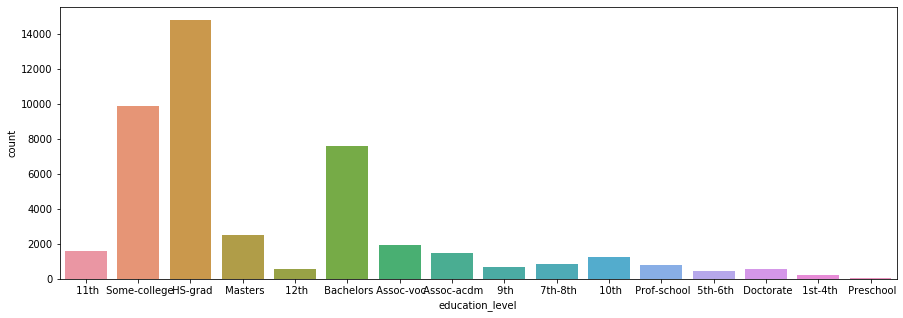

Univariate plot for  education_num


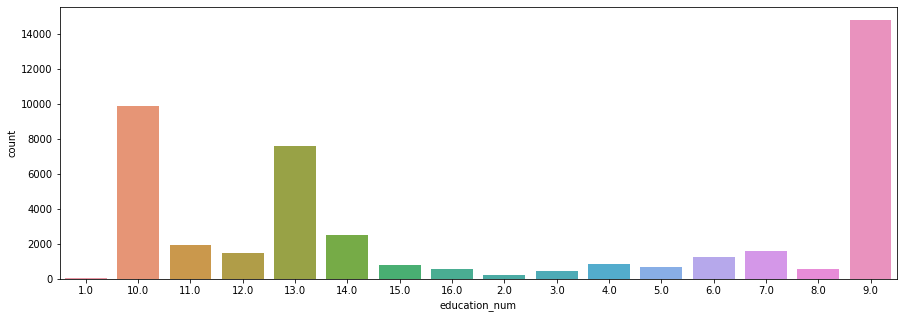

Univariate plot for  marital_status


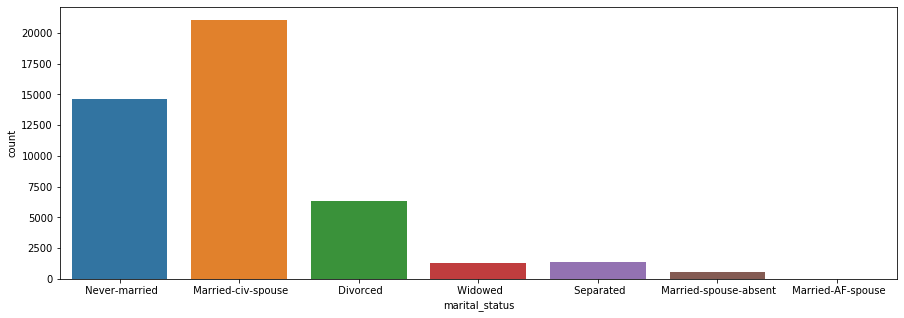

Univariate plot for  occupation


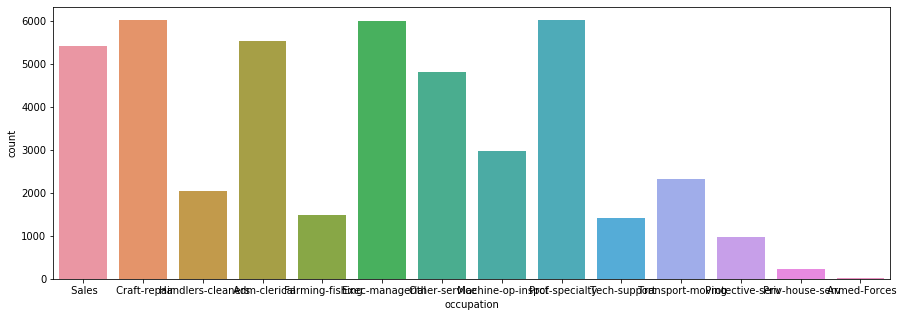

Univariate plot for  relationship


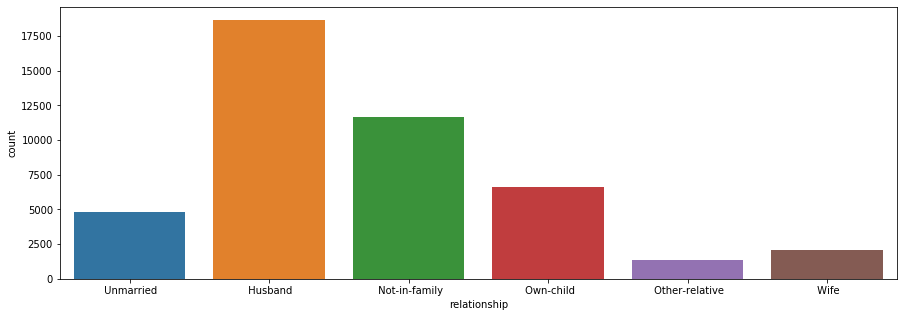

Univariate plot for  inquiry_purpose_code


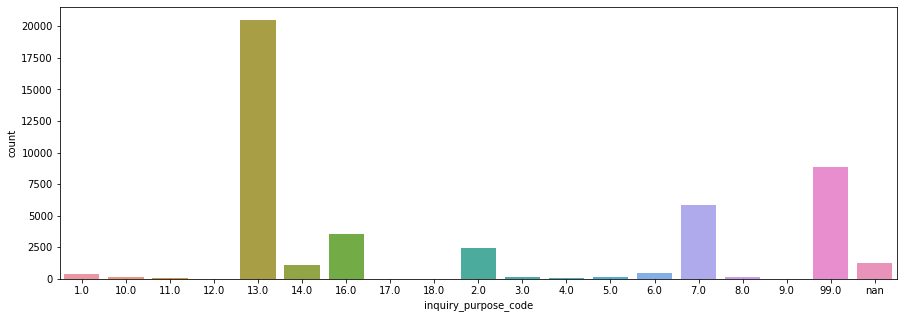

Univariate plot for  institute_type


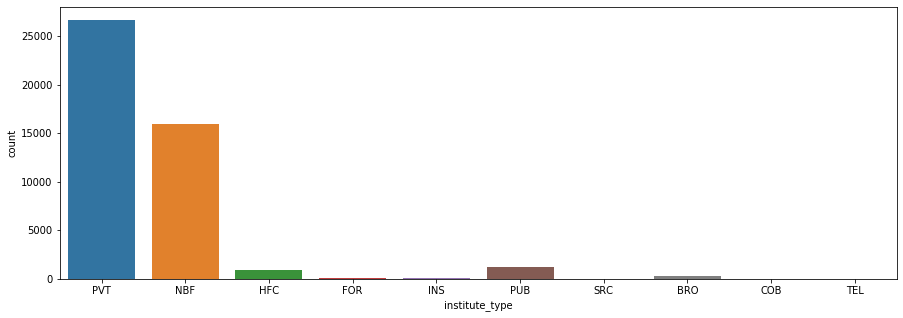

Univariate plot for  account_type


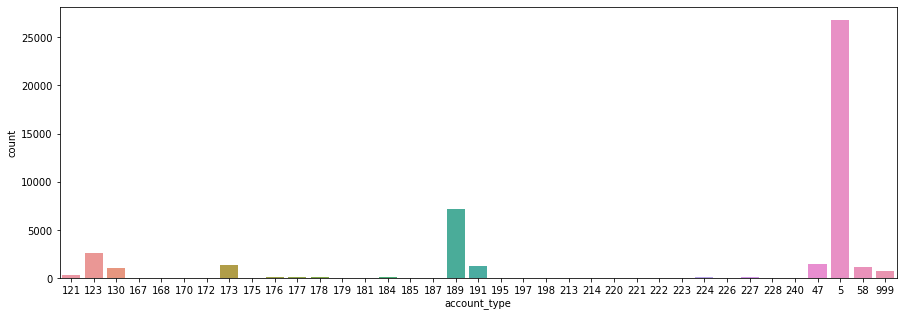

Univariate plot for  asset_class_cd


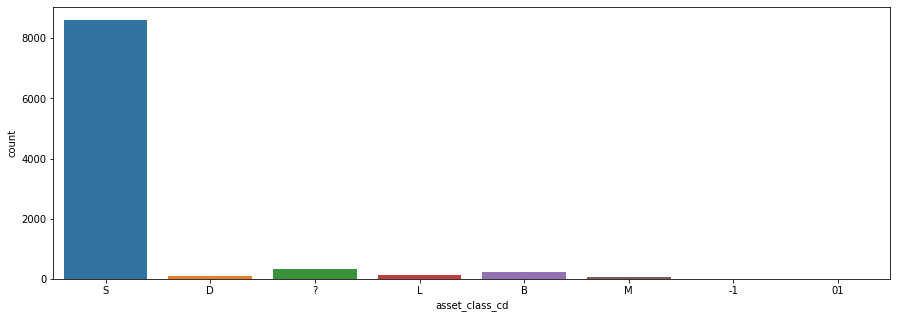

Univariate plot for  asset_code


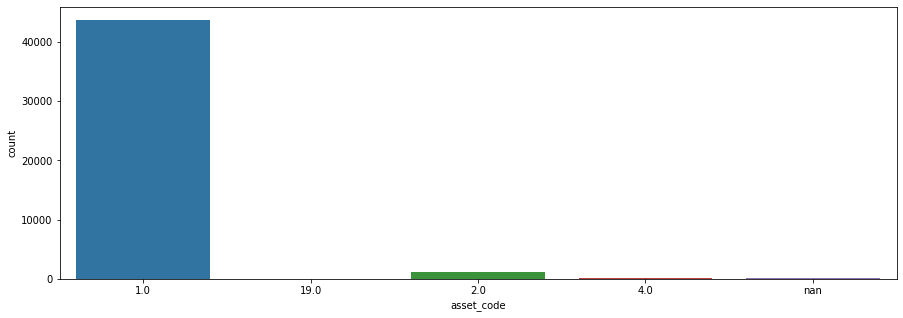

Univariate plot for  portfolio_type


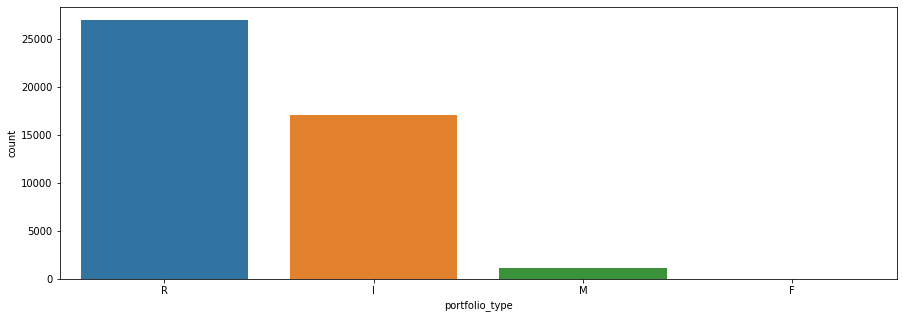

In [167]:
# Univariate Plots
for col in cat_var:
    if col not in ['address', 'email','domain','website','zip']:
        univarplots(data, col)

Bivariate plot for  gender  with  approved




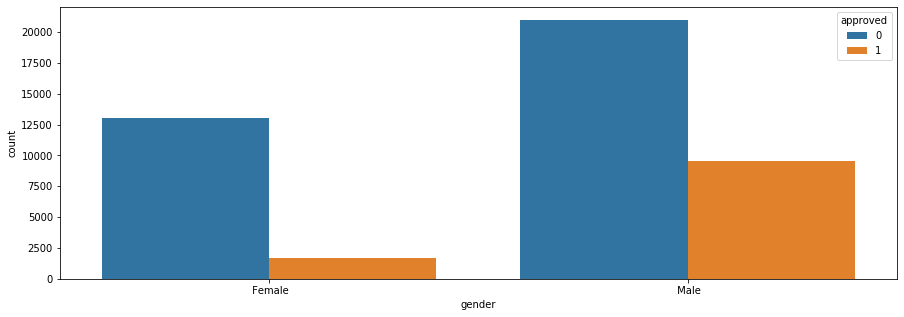

Bivariate plot for  workclass  with  approved




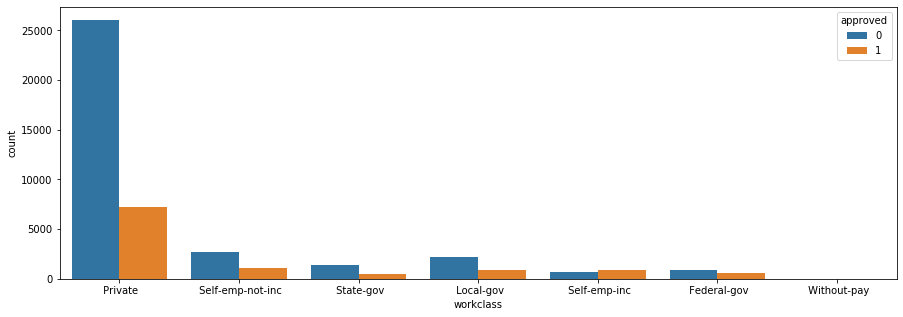

Bivariate plot for  education_level  with  approved




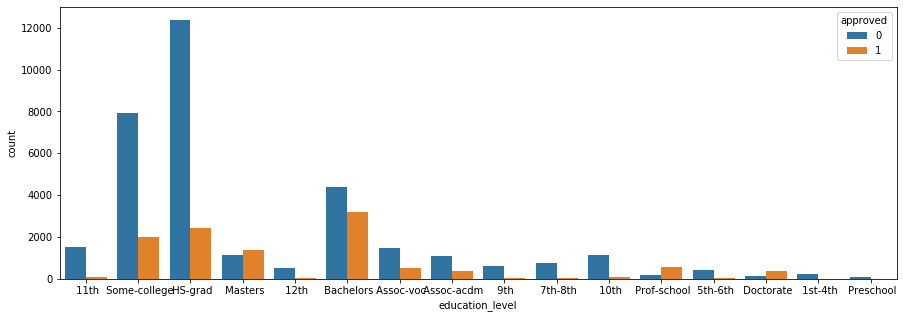

Bivariate plot for  education_num  with  approved




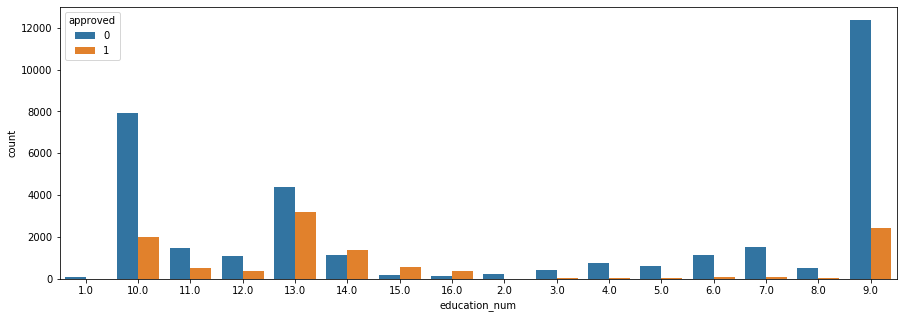

Bivariate plot for  marital_status  with  approved




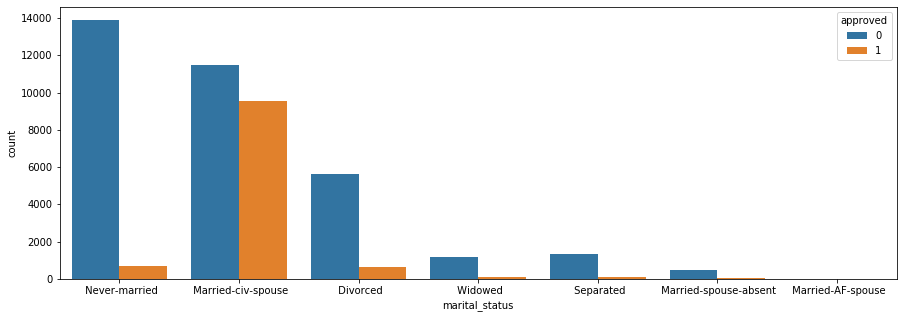

Bivariate plot for  occupation  with  approved




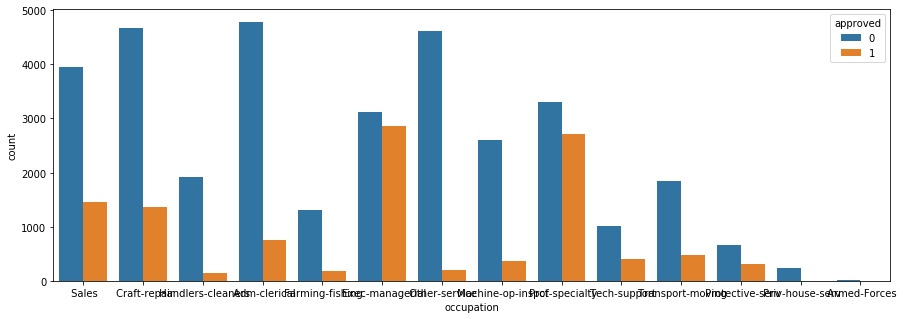

Bivariate plot for  relationship  with  approved




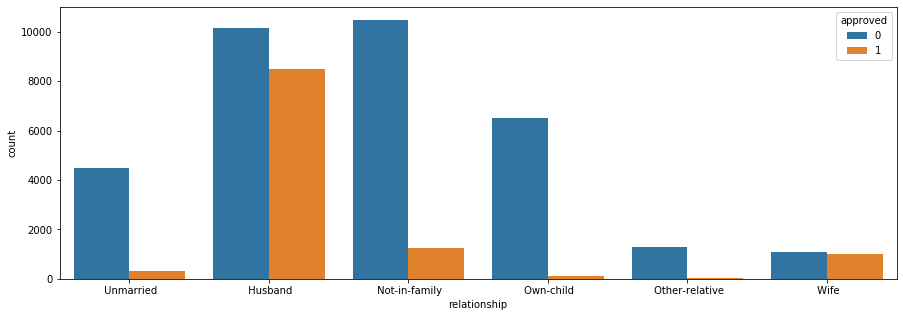

Bivariate plot for  inquiry_purpose_code  with  approved




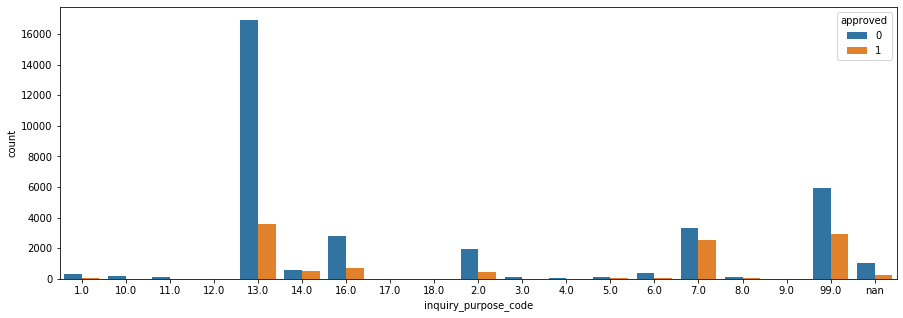

Bivariate plot for  institute_type  with  approved




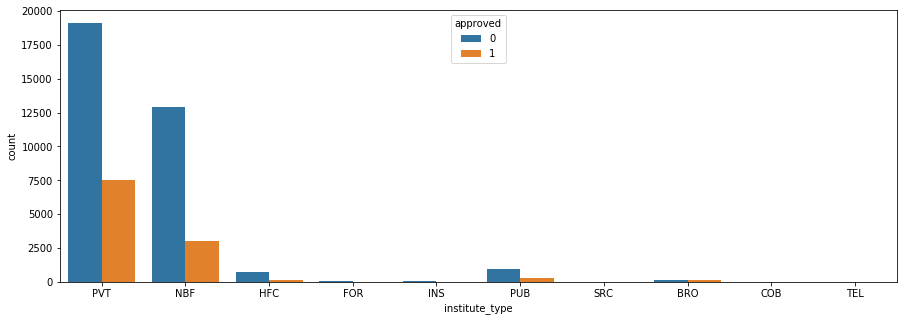

Bivariate plot for  account_type  with  approved




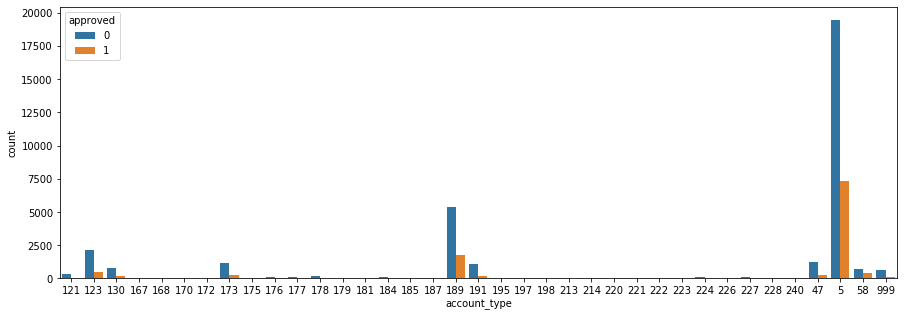

Bivariate plot for  asset_class_cd  with  approved




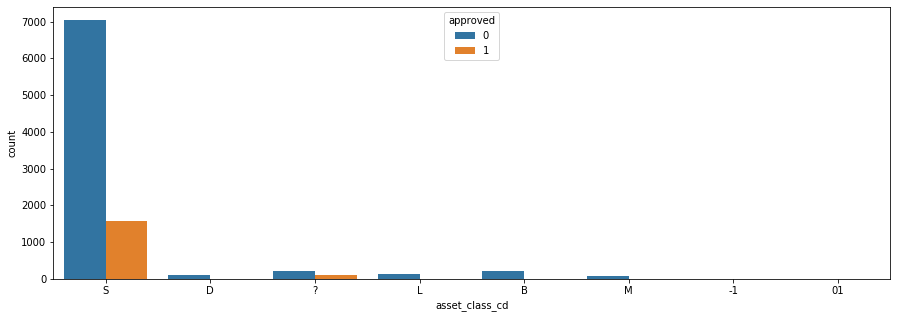

Bivariate plot for  asset_code  with  approved




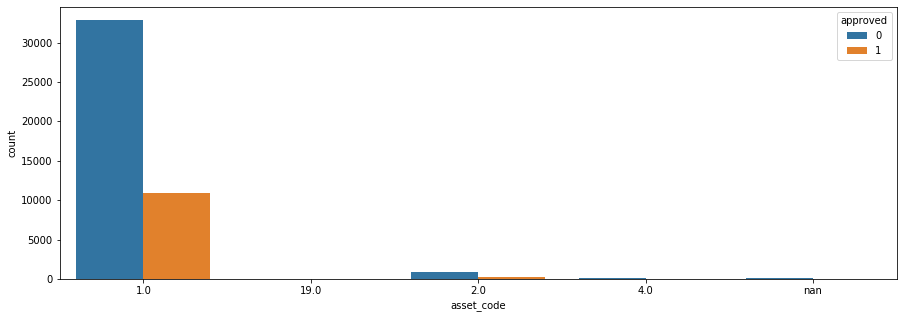

Bivariate plot for  portfolio_type  with  approved




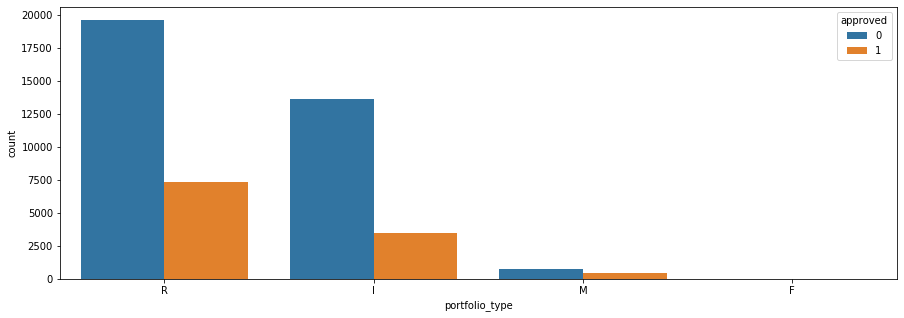

In [168]:
# Bivariate Plots with "approved"
for col in cat_var:
    if col not in ['address', 'email','domain','website','zip']:
        bivarplots(data, col, "approved")

### Numeric variables exploration

In [193]:
pd.options.display.max_rows = None
descstats = pd.concat([df[num_var].dtypes.rename("type"),
           df[num_var].nunique().rename("Num_unique"),
           df[num_var].describe().transpose()]
         ,axis=1)
descstats

,type,Num_unique,count,mean,std,min,25%,50%,75%,max
capital_gain,float64,121,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital_loss,float64,97,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours_per_week,float64,96,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0
approved,int64,2,45222.0,0.247844,0.431766,0.0,0.0,0.0,0.0,1.0
age,float64,74,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
Yr,int64,73,45222.0,1981.315444,13.034357,1930.0,1973.0,1983.0,1992.0,2002.0
Mth,int64,2,45222.0,2.502764,3.777886,1.0,1.0,1.0,1.0,12.0
box_ind,int64,2,45222.0,0.071713,0.258015,0.0,0.0,0.0,0.0,1.0
suite_ind,int64,2,45222.0,0.221773,0.415444,0.0,0.0,0.0,0.0,1.0


In [185]:
descstats[descstats['min'] < 0]

,type,Num_unique,count,mean,std,min,25%,50%,75%,max


In [197]:
descstats[(descstats['max'] == 99.0) | (descstats['max'] == 999.0) | (descstats['max'] == 9999.0) | (descstats['max'] == 99999.0)]

,type,Num_unique,count,mean,std,min,25%,50%,75%,max
capital_gain,float64,121,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
hours_per_week,float64,96,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [196]:
descstats[(descstats['max'] == 99.0) | (descstats['max'] == 999.0) | (descstats['max'] == 9999.0) | (descstats['max'] == 99999.0)]

,type,Num_unique,count,mean,std,min,25%,50%,75%,max
hours_per_week,float64,96,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [ ]:
"""
From the above table, we can infer the following things:
capital_gain has special values (outlier?) of 99999 for a part of the population
hours_per_week has a value of 99 - need to check whether it is a special value or not
Event rate (% approved) is 24.8% approximately
"""

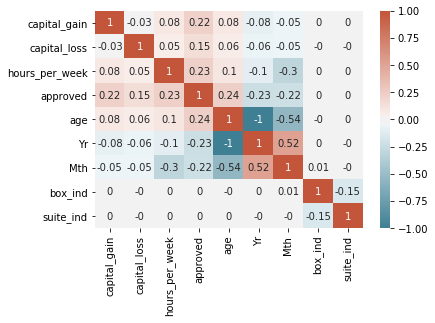

In [126]:
# analyzing the correlation between the numeric variables

df_num = df[num_var]
corr = df_num.corr()
sns.heatmap(np.round(corr,2), 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True)
           )

In [ ]:
# Plotting Histograms

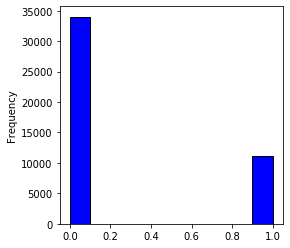

In [134]:
df_num['approved'].plot(kind='hist', bins=10, figsize=(4,4), facecolor='blue', edgecolor='black')

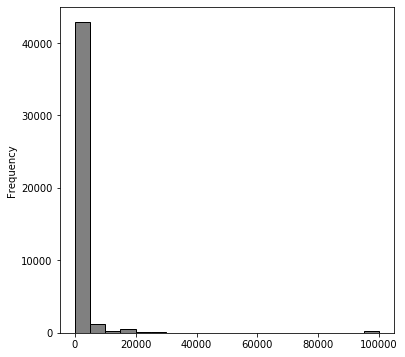

In [135]:
df_num['capital_gain'].plot(kind='hist', bins=20, figsize=(6,6), facecolor='grey', edgecolor='black')

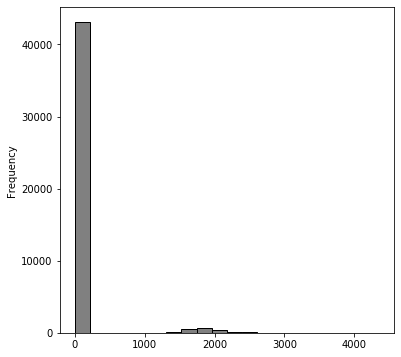

In [136]:
df_num['capital_loss'].plot(kind='hist', bins=20, figsize=(6,6), facecolor='grey', edgecolor='black')

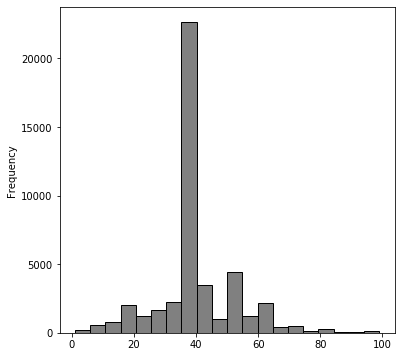

In [137]:
df_num['hours_per_week'].plot(kind='hist', bins=20, figsize=(6,6), facecolor='grey', edgecolor='black')

In [ ]:
# Generating box plots

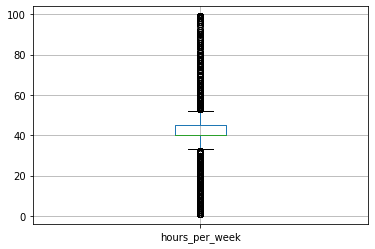

In [141]:
df_num.boxplot('hours_per_week')

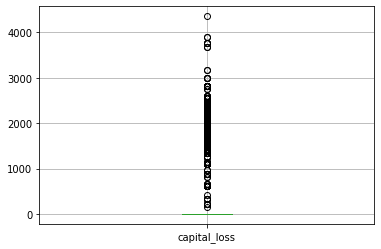

In [142]:
df_num.boxplot('capital_loss')

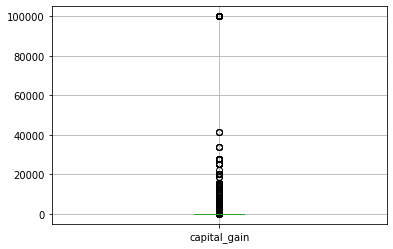

In [143]:
df_num.boxplot('capital_gain')

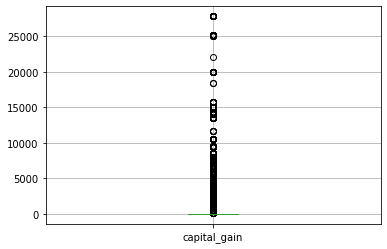

In [145]:
# Since capital gain has special vaues which may be outliers, a more realistic plot below
df_num[df_num['capital_gain'] < 30000].boxplot('capital_gain')

# 3. Data treatment

### 3.1 Creating dummies for categorical variables

In [235]:
df.groupby(by='domain').size().sort_values(ascending=False)
# domain
# com            31602
# org             1559
# biz             1539
# info            1530
# net             1527

domain
com            31602
org             1559
biz             1539
info            1530
net             1527
smith            158
johnson          110
williams         107
jones            103
brown             97
miller            77
davis             75
wilson            64
garcia            63
thomas            56
taylor            55
martinez          52
anderson          52
allen             50
clark             50
rodriguez         50
martin            48
jackson           46
lopez             46
robinson          44
thompson          40
lee               40
hernandez         38
young             37
moore             37
hall              37
gonzalez          36
harris            36
flores            35
white             34
ramirez           34
green             34
sanchez           32
adams             31
perez             30
king              30
scott             28
walker            28
torres            27
evans             27
carter            26
mitchell          26
lewis 

In [236]:
df.groupby(by='website').size().sort_values(ascending=False)
# website
# gmail          7560
# yahoo          7496
# hotmail        7476

website
gmail          7560
yahoo          7496
hotmail        7476
smith           486
johnson         397
williams        288
jones           282
brown           277
davis           230
miller          225
garcia          196
martinez        174
wilson          174
martin          151
rodriguez       151
taylor          147
lee             146
thomas          145
hernandez       144
anderson        142
thompson        138
white           134
moore           129
jackson         123
harris          113
lopez           111
lewis           105
clark           105
gonzalez        105
robinson        104
perez           102
hall             98
walker           98
sanchez          96
campbell         95
young            95
wright           93
allen            91
adams            90
king             89
hill             87
nelson           86
carter           85
turner           82
baker            82
green            81
scott            78
evans            76
torres           76
rogers      

In [ ]:
# Getting State from Zipcode

In [264]:
pip install pyzipcode
from pyzipcode import ZipCodeDatabase
zipdb = ZipCodeDatabase()

In [283]:
zipval = df['zip'].values

In [286]:
states=[]
for i in range(len(zipval)):
    try:
        states.append(zipdb[zipval[i]].state)
    except:
        states.append('')

In [313]:
df1 = df.copy()
df1['state'] = pd.Series(states, index = df1.index)

In [291]:
df1.groupby(by='state').size().sort_values(ascending=False)

state
      25562
TX     1283
CA     1222
PA     1050
NY     1041
IL      733
OH      655
FL      647
MO      580
VA      572
IA      521
MI      516
NC      513
MN      505
IN      459
KY      456
GA      455
WI      430
WV      409
TN      405
AL      386
AR      366
KS      365
OK      362
WA      351
CO      322
NJ      321
LA      310
MA      309
NE      278
MD      273
MS      268
OR      249
AZ      244
ME      243
SC      230
CT      198
ND      195
SD      195
MT      186
NM      183
VT      166
UT      158
ID      157
NH      154
DC      132
AK      116
NV      114
PR      112
WY       82
HI       72
DE       57
RI       51
VI        3
dtype: int64

In [314]:
df1['domain_new']  = df1['domain'].apply(lambda x:x if x in ['com','org','net','info','biz'] else 'other')
df1['website_new'] = df1['website'].apply(lambda x:x if x in ['gmail','yahoo','hotmail'] else 'other')
df1['state_new']   = df1['state'].apply(lambda x:'OT' if x in [''] else x)

In [315]:
df1.drop(['Mth','Yr','domain','website','zip','state','email','address'], axis=1, inplace=True)

In [316]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 307c73a3-0c67-43b5-b0d1-62ad5f00b52a to 82eab6e5-57ab-4fd7-8923-e7790390c473
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                45222 non-null  object 
 1   workclass             45222 non-null  object 
 2   education_level       45222 non-null  object 
 3   education_num         45222 non-null  object 
 4   marital_status        45222 non-null  object 
 5   occupation            45222 non-null  object 
 6   relationship          45222 non-null  object 
 7   capital_gain          45222 non-null  float64
 8   capital_loss          45222 non-null  float64
 9   hours_per_week        45222 non-null  float64
 10  approved              45222 non-null  int64  
 11  inquiry_purpose_code  45222 non-null  object 
 12  institute_type        45222 non-null  object 
 13  account_type          45222 non-null  object 
 14  asset_cla

In [317]:
"""
Missing Value treatment for asset_class_cd & portfolio_type
"""

'\nMissing Value treatment for asset_class_cd & portfolio_type\n'

In [324]:
df1['asset_class_cd_new']   = df1['asset_class_cd'].fillna('-1').apply(lambda x:-1 if x in [None, -1, 1, ''] else x)
df1['portfolio_type_new']   = df1['portfolio_type'].fillna('O')

In [327]:
df1.drop(['asset_class_cd','portfolio_type'], axis=1, inplace=True)

In [328]:
cat_var = list(df1.select_dtypes(include='object').columns)
num_var = list(df1.select_dtypes(exclude='object').columns)

In [333]:
for col in cat_var:
    print('Num unique values for', col, 'is:',df1[col].nunique())

Num unique values for gender is: 2
Num unique values for workclass is: 7
Num unique values for education_level is: 16
Num unique values for education_num is: 16
Num unique values for marital_status is: 7
Num unique values for occupation is: 14
Num unique values for relationship is: 6
Num unique values for inquiry_purpose_code is: 19
Num unique values for institute_type is: 10
Num unique values for account_type is: 37
Num unique values for asset_code is: 5
Num unique values for domain_new is: 6
Num unique values for website_new is: 4
Num unique values for state_new is: 54
Num unique values for asset_class_cd_new is: 8
Num unique values for portfolio_type_new is: 5


In [334]:
## Creating dummies for the categorical features

df2 = df1.copy()
for col in cat_var:
    samp = pd.get_dummies(df2[col], prefix=col)
    df2 = pd.concat([df2,samp],axis=1)
    df2.drop(col, axis=1, inplace=True)

In [336]:
df1.shape , df2.shape

((45222, 23), (45222, 223))

In [337]:
df2.columns

Index(['capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'age',
       'box_ind', 'suite_ind', 'gender_ Female', 'gender_ Male',
       'workclass_ Federal-gov',
       ...
       'asset_class_cd_new_B', 'asset_class_cd_new_D', 'asset_class_cd_new_L',
       'asset_class_cd_new_M', 'asset_class_cd_new_S', 'portfolio_type_new_F',
       'portfolio_type_new_I', 'portfolio_type_new_M', 'portfolio_type_new_O',
       'portfolio_type_new_R'],
      dtype='object', length=223)

### 3.2 MVT & Outlier Treatment for numeric values

In [338]:
df2[num_var].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).transpose()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
capital_gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,15024.0,99999.0
capital_loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,4356.0
hours_per_week,45222.0,40.938017,12.007508,1.0,10.0,20.0,40.0,40.0,45.0,60.0,80.0,99.0
approved,45222.0,0.247844,0.431766,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
age,45222.0,38.547941,13.217870,17.0,17.0,20.0,28.0,37.0,47.0,62.0,73.0,90.0
box_ind,45222.0,0.071713,0.258015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
suite_ind,45222.0,0.221773,0.415444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
# No numeric variable has null values - so, only OT needs to be performed for before modelling

In [339]:
df3 = df2.copy()
for col in ['capital_gain', 'capital_loss', 'hours_per_week', 'age']: 
    sorted(df3[col])
    lower_bound, upper_bound = np.percentile(df3[col], [1, 99])
    df3[col] = np.where(df3[col] < lower_bound, lower_bound, df3[col])
    df3[col] = np.where(df3[col] > upper_bound, upper_bound, df3[col])

In [340]:
df3[num_var].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).transpose()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
capital_gain,45222.0,642.441732,2537.765888,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,15024.0,15024.0
capital_loss,45222.0,85.285856,386.538338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,1980.0
hours_per_week,45222.0,40.895051,11.565801,10.0,10.0,20.0,40.0,40.0,45.0,60.0,80.0,80.0
approved,45222.0,0.247844,0.431766,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
age,45222.0,38.496152,13.061560,17.0,17.0,20.0,28.0,37.0,47.0,62.0,73.0,73.0
box_ind,45222.0,0.071713,0.258015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
suite_ind,45222.0,0.221773,0.415444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


# 4. Final Modelling of "approved"

In [346]:
X_col = list(df3.columns)
y_col = ['approved']
X_col.remove('approved')

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X_train, X_test, y_train, y_test = train_test_split(df3[X_col], df3[y_col], train_size = 0.7, random_state=42 )

In [354]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [475]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), index=X_train.index, columns=X_train.columns)

In [635]:
# Saving the feature scaling model using pickle
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\MinMaxScaler_LR.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
# code to load the model object
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\MinMaxScaler_LR.pkl', 'rb') as file:
        scaler = pickle.load(file)

# Describing the loaded model
scaler

# Transforming the test data with the loaded object
scaler.transform(X_test)

In [357]:
# Define UDFs for model evaluation

In [440]:
def ks_table(y_true, y_pred, n_groups=10, store=False):
    temp_df = pd.DataFrame({'Actual':y_true, 'Predicted':y_pred})
    temp_df.sort_values(by='Predicted', ascending=False, inplace=True)
    temp_df.reset_index()
    temp_df['groups'] = pd.qcut(temp_df['Predicted'], n_groups)
    temp_df['cnt'] = 1
    smry = temp_df.groupby('groups').agg({'Predicted': [ "min", "max", "mean"], 
                              'Actual': "sum",
                              'cnt': "sum"
                             })
    smry.reset_index(inplace=True)
    smry['Group'] = n_groups - smry.index.astype(np.int32)
    smry.sort_values(by='Group', inplace=True)
    smry['Observations'] = smry['cnt']['sum']
    smry['Events'] = smry['Actual']['sum']
    smry['Non-Events'] = smry['cnt']['sum'] - smry['Events']
    smry['Cum-Obs(%)'] = np.round((smry['Observations'].cumsum()/ smry['Observations'].sum()),4)
    smry['Cum-Events(%)'] = np.round((smry['Events'].cumsum()/ smry['Events'].sum()),4)
    smry['Cum-Non-Events(%)'] = np.round((smry['Non-Events'].cumsum()/ smry['Non-Events'].sum()),4)
    smry['Act Event Rate(%)'] = smry['Events']/smry['Observations']
    smry['Pred Event Rate(%)'] = smry['Predicted']['mean']
    smry['Min Score'] = smry['Predicted']['min']
    smry['Max Score'] = smry['Predicted']['max']
    smry['KS-Score'] = np.round((- smry['Cum-Non-Events(%)'] + smry['Cum-Events(%)']),4)
    print("Max KS is", smry['KS-Score'].max())
    if store:
        return smry[['Group', 'Min Score', 'Max Score', 'Observations', 'Cum-Obs(%)', 'Events', 'Cum-Events(%)', 
                     'Non-Events', 'Cum-Non-Events(%)', 'Pred Event Rate(%)', 'Act Event Rate(%)', 'KS-Score']]

In [549]:
def plotroc(fpr, tpr, charttitle):
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (Area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(charttitle)
    plt.legend(loc="lower right")
    plt.show()

In [581]:
def plotfeatimp(col, featimp, charttitle):
    newarr = list(zip(col, featimp))
    plt.clf()
    plt.figure(figsize=(15, 10))
    plt.title("Feature importances")
    plt.bar([x[0] for x in newarr], [x[1] for x in newarr], color="r", align="center")
    # plt.xticks(range(X_train_scaled.shape[1]), indices)
    plt.title(charttitle)
    plt.xlim([-1, len(col)])
    plt.show()

### 4.1 Simple Logistic regression model (Benchmark)

In [506]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, recall_score, f1_score, roc_curve
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [ ]:
# Variable Reduction Steps

In [502]:
# Since it is a benchmark model, we do a simple RFE to reduce the features from 222

In [507]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_scaled.values, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

[ True  True  True  True False False False False False False False False
 False False False False False False  True  True  True  True False False
 False  True False False  True  True False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False  True False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [510]:
# rfe.support_
# rfe.ranking_
newcol = X_train_scaled.columns.values[rfe.support_]

In [511]:
# Shortlisted columns by the Iterative process
newcol

array(['capital_gain', 'capital_loss', 'hours_per_week', 'age',
       'education_level_ 1st-4th', 'education_level_ 5th-6th',
       'education_level_ 7th-8th', 'education_level_ 9th',
       'education_level_ Doctorate', 'education_level_ Preschool',
       'education_level_ Prof-school',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'occupation_ Farming-fishing', 'occupation_ Priv-house-serv',
       'account_type_178', 'account_type_224', 'asset_class_cd_new_B',
       'asset_class_cd_new_D', 'asset_class_cd_new_L'], dtype=object)

In [ ]:
# Building a final Logistic Regression Model with the new features

In [512]:
X_train_scaled_new = X_train_scaled[newcol].copy()

In [517]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), index=X_test.index, columns=X_test.columns)
X_test_scaled_new = X_test_scaled[newcol].copy()

In [515]:
LR_model = LogisticRegression(max_iter=200, random_state=42, verbose=1)
LR_model.fit(X_train_scaled_new.values,y_train.values)

H:\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [539]:
# Predictions on Train & Test Data
y_pred_train = LR_model.predict(X_train_scaled_new.values)
y_pred_test  = LR_model.predict(X_test_scaled_new.values)
y_pred_prob_train = np.array([x[1] for x in LR_model.predict_proba(X_train_scaled_new.values)])
y_pred_prob_test  = np.array([x[1] for x in LR_model.predict_proba(X_test_scaled_new.values)])

In [540]:
# Accuracy
accuracy_train_LR = accuracy_score(y_pred_train,y_train.values)
accuracy_test_LR  = accuracy_score(y_pred_test,y_test.values)

In [541]:
# AUC & Confusion Matrix
fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train.values, y_pred_prob_train)
fpr_test_LR, tpr_test_LR, _   = roc_curve(y_test.values, y_pred_prob_test)
auc_train_LR = auc(fpr_train_LR,tpr_train_LR)
auc_test_LR = auc(fpr_test_LR,tpr_test_LR)

In [542]:
# 82% Accuracy - Not bad for a quick & dirty logistic model
print("Train accuracy {}".format(accuracy_train_LR))
print("Test accuracy is {}".format(accuracy_test_LR))

# AUC of 87% - Not bad at all for a benchmark model
print('Train AUC is {}'.format(auc_train_LR))
print('Test AUC is {}'.format(auc_test_LR))

Train accuracy 0.812446690886116
Test accuracy is 0.8150659688951132
Train AUC is 0.876353354883999
Test AUC is 0.8744970804280767


In [527]:
# Confusion Matrix if needed
confusion_test_LR = confusion_matrix(y_test, y_pred_test)
confusion_test_LR

array([[9594,  648],
       [1861, 1464]], dtype=int64)

<Figure size 432x288 with 0 Axes>

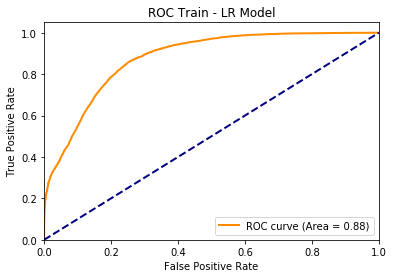

<Figure size 432x288 with 0 Axes>

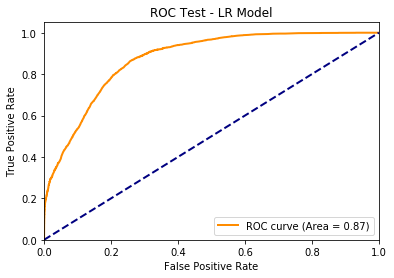

In [552]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
plotroc(fpr_train_LR, tpr_train_LR, 'ROC Train - LR Model')
plotroc(fpr_test_LR, tpr_test_LR, 'ROC Test - LR Model')

In [ ]:
# KS table on Train data
ks_train = ks_table(y_train.values.flatten(), y_pred_prob_train.flatten(), n_groups=10, store=True)
ks_train

In [ ]:
# KS table on Test data
ks_test = ks_table(y_test.values.flatten(), y_pred_prob_test.flatten(), n_groups=10, store=True)
ks_test

In [634]:
# Saving the final model using pickle
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\LR_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

In [ ]:
# code to load the model
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\LR_model.pkl', 'rb') as file:
        LR_model_pkl = pickle.load(file)

# Describing the loaded model
LR_model_pkl

# Scoring the loaded model on test data
LR_model_pkl.predict(X_test_scaled_new)

## 4.2 Boosting - GBM (can substitute with XGBoost as well) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, auc, confusion_matrix, recall_score, f1_score, roc_curve

In [ ]:
# Since it is a tee-based model, we do not need to worry about intercorrelated variables

In [555]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), index=X_test.index, columns=X_test.columns)

In [ ]:
# Trying out a simple GBM with default/intuitive parameters

In [558]:
model_igbm = GradientBoostingClassifier(
                                        loss='deviance',
                                        learning_rate=0.1,
                                        n_estimators=100,
                                        subsample=1.0,
                                        min_samples_leaf=32,
                                        max_depth=4,
                                        min_impurity_split=None,
                                        random_state=42,
                                        verbose=1,
                                        presort='deprecated',
                                        validation_fraction=0.25,
                                        )
model_igbm.fit(X_train_scaled.values,y_train.values)

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.0517           21.23s
         2           0.9984           20.14s
         3           0.9535           19.67s
         4           0.9181           19.04s
         5           0.8872           18.73s
         6           0.8613           18.43s
         7           0.8378           18.35s
         8           0.8180           18.01s
         9           0.8005           17.87s
        10           0.7850           17.69s
        20           0.6939           16.02s
        30           0.6516           13.79s
        40           0.6240           11.65s
        50           0.6065            9.62s
        60           0.5942            7.63s
        70           0.5827            5.70s
        80           0.5741            3.77s
        90           0.5665            1.87s
       100           0.5607            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=32, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.25, verbose=1,
                           warm_start=False)

<Figure size 432x288 with 0 Axes>

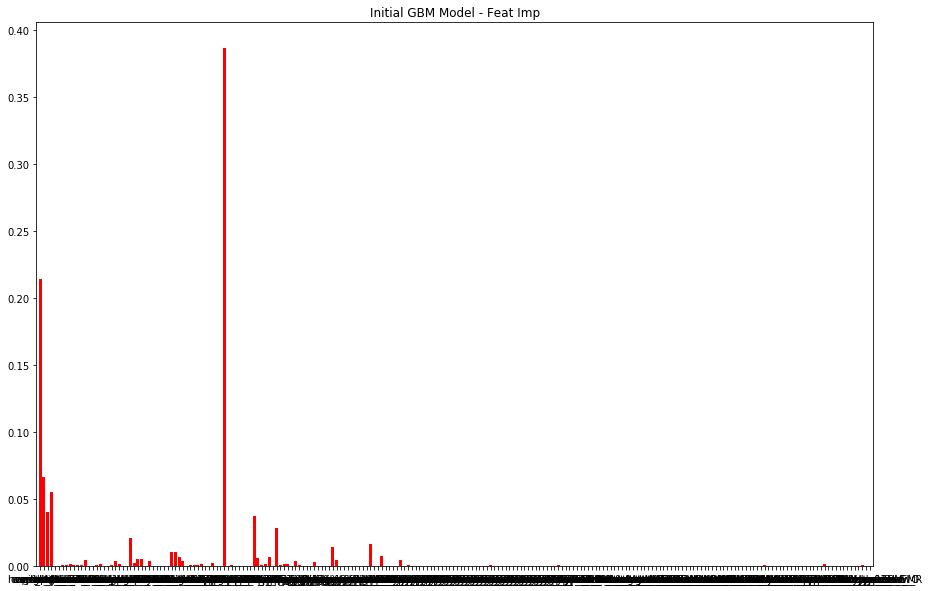

In [582]:
# Plotting Feature importances - we see that around ~20 variables explain most of the model
plotfeatimp(X_train_scaled.columns.values, model_igbm.feature_importances_, 'Initial GBM Model - Feat Imp')

In [573]:
# Predictions on Train & Test Data
y_pred_train = model_igbm.predict(X_train_scaled.values)
y_pred_test  = model_igbm.predict(X_test_scaled.values)
y_pred_prob_train = np.array([x[1] for x in model_igbm.predict_proba(X_train_scaled.values)])
y_pred_prob_test  = np.array([x[1] for x in model_igbm.predict_proba(X_test_scaled.values)])

In [574]:
# Accuracy
accuracy_train_igbm = accuracy_score(y_pred_train,y_train.values)
accuracy_test_igbm = accuracy_score(y_pred_test,y_test.values)

In [575]:
# AUC & Confusion Matrix
fpr_train_igbm, tpr_train_igbm, _ = roc_curve(y_train.values, y_pred_prob_train)
fpr_test_igbm, tpr_test_igbm, _   = roc_curve(y_test.values, y_pred_prob_test)
auc_train_igbm = auc(fpr_train_igbm,tpr_train_igbm)
auc_test_igbm = auc(fpr_test_igbm,tpr_test_igbm)

In [577]:
# 87% Accuracy - Already comfortably beating the LR model
print("Train accuracy {}".format(accuracy_train_igbm))
print("Test accuracy is {}".format(accuracy_test_igbm))

# AUC of 93%
print('Train AUC is {}'.format(auc_train_igbm))
print('Test AUC is {}'.format(auc_test_igbm))

Train accuracy 0.8735744748065076
Test accuracy is 0.871747622908528
Train AUC is 0.9321874864790717
Test AUC is 0.9287523436593828


In [578]:
# Confusion Matrix if needed
confusion_test_igbm = confusion_matrix(y_test, y_pred_test)
confusion_test_igbm

array([[9710,  532],
       [1208, 2117]], dtype=int64)

<Figure size 432x288 with 0 Axes>

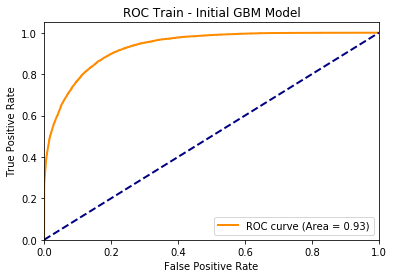

<Figure size 432x288 with 0 Axes>

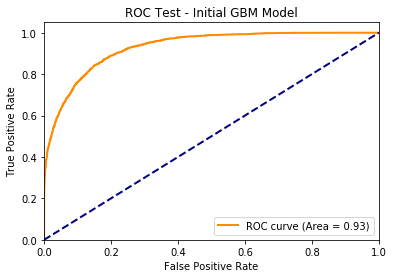

In [579]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
plotroc(fpr_train_igbm, tpr_train_igbm, 'ROC Train - Initial GBM Model')
plotroc(fpr_test_igbm, tpr_test_igbm, 'ROC Test - Initial GBM Model')

In [ ]:
# KS table on Train data
ks_train = ks_table(y_train, y_pred_train, n_groups=10, store=True)
ks_train

In [ ]:
# KS table on Test data
ks_test = ks_table(y_test, y_pred_test, n_groups=10, store=True)
ks_test

### Grid search

In [ ]:
"""
WHat we can do is to pick some of those important features which explain most of the model & run a grid search to get the 
best set of parameters
"""

In [594]:
temp_df1 = pd.DataFrame({'feature':X_train_scaled.columns.values}) 
temp_df2 = pd.DataFrame({'imp':model_igbm.feature_importances_}) 
temp_df = pd.concat((temp_df1, temp_df2), axis=1)

In [598]:
temp_df.sort_values(by='imp', inplace=True, ascending=False)
temp_df['cum_imp'] = temp_df['imp'].cumsum()
# Picking all the best features that total up to 99% of the importance
temp_df = temp_df[temp_df['cum_imp'] <= 0.99].reset_index()
temp_df = temp_df[['feature','imp']]
newcol = list(temp_df['feature'].values)

In [599]:
X_train_scaled_new = X_train_scaled[newcol].copy()
X_test_scaled_new = X_test_scaled[newcol].copy()

In [605]:
# hyperparameter tuning

# specify range of hyperparameters
param_grid = {
            'subsample' : [0.5, 0.75, 1],
            'learning_rate' : np.arange(0.01, 0.32, 0.03), 
            'n_estimators' : range(100,501,100),
            'max_depth' : [3, 4, 5, 6],
            'min_samples_split' : [16, 32, 64, 128],
            'loss' : ['deviance','exponential']
            }

# set up Grid Search
model_cv = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = param_grid, 
                        n_iter=100, random_state=None, scoring= 'roc_auc', cv = 4, verbose = 1, refit='AUC')

In [606]:
model_cv.fit(X_train_scaled_new.values, y_train.values)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [607]:
# Fetching the best parameters in the GRID
print(model_cv.best_params_)

{'subsample': 1, 'n_estimators': 500, 'min_samples_split': 16, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.09999999999999999}


In [608]:
gbmmodel = GradientBoostingClassifier(**model_cv.best_params_)
gbmmodel.fit(X_train_scaled_new.values, y_train.values)

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.09999999999999999,
                           loss='exponential', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=16, min_weight_fraction_leaf=0.0,
                           n_estimators=500, n_iter_no_change=None,
                           presort='deprecated', random_state=None, subsample=1,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

<Figure size 432x288 with 0 Axes>

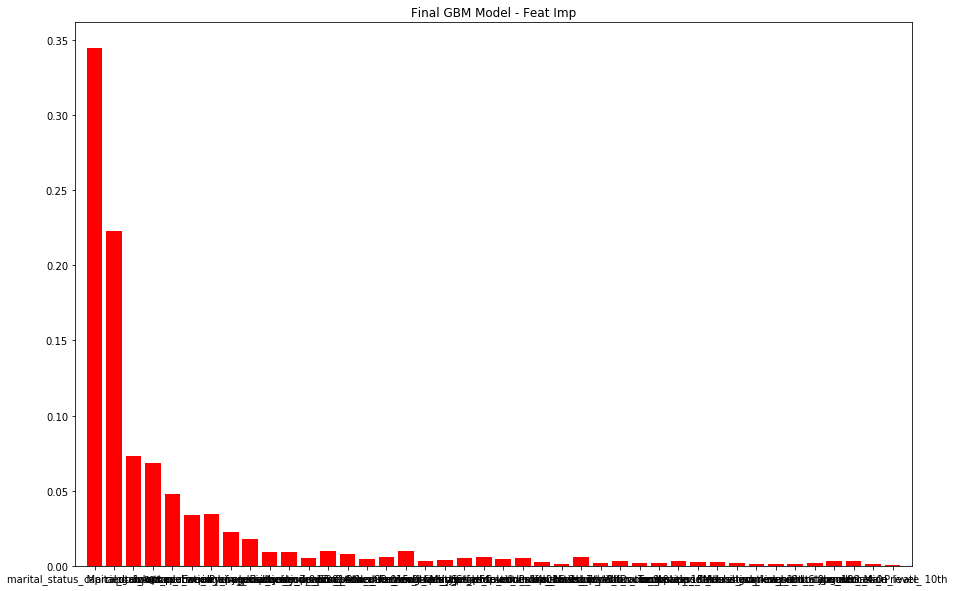

In [609]:
# Plotting Final Feature importances
plotfeatimp(X_train_scaled_new.columns.values, gbmmodel.feature_importances_, 'Final GBM Model - Feat Imp')

In [610]:
# Predictions on Train & Test Data
y_pred_train = gbmmodel.predict(X_train_scaled_new.values)
y_pred_test  = gbmmodel.predict(X_test_scaled_new.values)
y_pred_prob_train = np.array([x[1] for x in gbmmodel.predict_proba(X_train_scaled_new.values)])
y_pred_prob_test  = np.array([x[1] for x in gbmmodel.predict_proba(X_test_scaled_new.values)])

In [614]:
# Accuracy
accuracy_train_fgbm = accuracy_score(y_pred_train,y_train.values)
accuracy_test_fgbm = accuracy_score(y_pred_test,y_test.values)

In [615]:
# AUC & Confusion Matrix
fpr_train_fgbm, tpr_train_fgbm, _ = roc_curve(y_train.values, y_pred_prob_train)
fpr_test_fgbm, tpr_test_fgbm, _   = roc_curve(y_test.values, y_pred_prob_test)
auc_train_fgbm = auc(fpr_train_fgbm,tpr_train_fgbm)
auc_test_fgbm = auc(fpr_test_fgbm,tpr_test_fgbm)

In [618]:
# 87% Accuracy - So, not better than our quick & dirty model
print("Train accuracy {}".format(accuracy_train_fgbm))
print("Test accuracy is {}".format(accuracy_test_fgbm))

# AUC of 93%
print('Train AUC is {}'.format(auc_train_fgbm))
print('Test AUC is {}'.format(auc_test_fgbm))

"""
This is a good results for the below reason:

We have reduced from 220+ variables to just ~40 variables. So, that loss of information is well compensated by choosing a better 
set of hyper parameters.
"""

Train accuracy 0.8785026062233454
Test accuracy is 0.875580452568733
Train AUC is 0.9397929239996125
Test AUC is 0.932531445779064


'\nThis is a good results for the below reason:\n\nWe have reduced from 220+ variables to just ~40 variables. So, that loss of information is well compensated by choosing a better \nset of hyper parameters.\n'

In [619]:
# Confusion Matrix if needed
confusion_test_fgbm = confusion_matrix(y_test, y_pred_test)
confusion_test_fgbm

array([[9616,  626],
       [1062, 2263]], dtype=int64)

<Figure size 432x288 with 0 Axes>

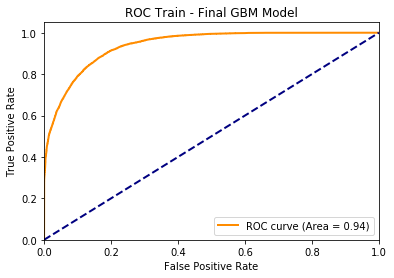

<Figure size 432x288 with 0 Axes>

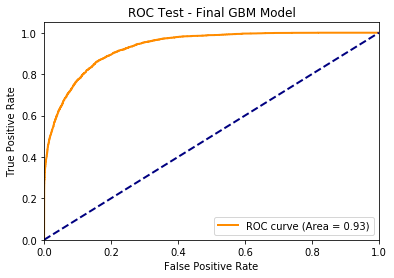

In [620]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
plotroc(fpr_train_fgbm, tpr_train_fgbm, 'ROC Train - Final GBM Model')
plotroc(fpr_test_fgbm, tpr_test_fgbm, 'ROC Test - Final GBM Model')

In [629]:
y_train.values.flatten() , y_pred_train

(array([0, 1, 1, ..., 1, 0, 0], dtype=int64),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64))

In [630]:
# KS table on Train data
ks_train = ks_table(y_train.values.flatten(), y_pred_prob_train.flatten(), n_groups=10, store=True)
ks_train

Max KS is 0.7067


,Group,Min Score,Max Score,Observations,Cum-Obs(%),Events,Cum-Events(%),Non-Events,Cum-Non-Events(%),Pred Event Rate(%),Act Event Rate(%),KS-Score
,,,,,,,,,,,,
9,1,8.401101e-01,0.999975,3166,0.1,3068,0.3892,98,0.0041,0.960467,0.969046,0.3851
8,2,5.360798e-01,0.840063,3165,0.2,2110,0.6569,1055,0.0485,0.681153,0.666667,0.6084
7,3,3.057761e-01,0.536046,3165,0.3,1361,0.8295,1804,0.1244,0.412743,0.430016,0.7051
6,4,1.590380e-01,0.305740,3166,0.4,798,0.9307,2368,0.2240,0.228385,0.252053,0.7067
5,5,7.035232e-02,0.159033,3165,0.5,350,0.9751,2815,0.3424,0.109403,0.110585,0.6327
4,6,2.729320e-02,0.070346,3166,0.6,133,0.9920,3033,0.4700,0.046024,0.042009,0.5220
3,7,1.044349e-02,0.027281,3165,0.7,50,0.9984,3115,0.6010,0.017492,0.015798,0.3974
2,8,3.325226e-03,0.010442,3166,0.8,12,0.9999,3154,0.7337,0.006330,0.003790,0.2662
1,9,5.210761e-04,0.003322,3165,0.9,1,1.0000,3164,0.8668,0.001647,0.000316,0.1332


In [631]:
# KS table on Test data
ks_test = ks_table(y_test.values.flatten(), y_pred_prob_test.flatten(), n_groups=10, store=True)
ks_test

Max KS is 0.6907


,Group,Min Score,Max Score,Observations,Cum-Obs(%),Events,Cum-Events(%),Non-Events,Cum-Non-Events(%),Pred Event Rate(%),Act Event Rate(%),KS-Score
,,,,,,,,,,,,
9,1,8.270001e-01,0.999997,1357,0.1000,1294,0.3892,63,0.0062,0.955721,0.953574,0.3830
8,2,5.310446e-01,0.826852,1357,0.2000,875,0.6523,482,0.0532,0.671314,0.644805,0.5991
7,3,3.056669e-01,0.530784,1356,0.3000,562,0.8214,794,0.1307,0.410509,0.414454,0.6907
6,4,1.614815e-01,0.305662,1357,0.4000,318,0.9170,1039,0.2322,0.228264,0.234340,0.6848
5,5,7.333138e-02,0.161425,1356,0.5000,174,0.9693,1182,0.3476,0.113240,0.128319,0.6217
4,6,2.927848e-02,0.073320,1357,0.6000,56,0.9862,1301,0.4746,0.047576,0.041268,0.5116
3,7,1.066840e-02,0.029249,1357,0.7000,32,0.9958,1325,0.6040,0.018393,0.023581,0.3918
2,8,3.532846e-03,0.010661,1354,0.7998,11,0.9991,1343,0.7351,0.006536,0.008124,0.2640
1,9,5.872431e-04,0.003532,1358,0.8999,3,1.0000,1355,0.8674,0.001759,0.002209,0.1326


In [632]:
# Saving the final model using pickle
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\Final_GBM_Model.pkl', 'wb') as file:
    pickle.dump(gbmmodel, file)

In [ ]:
# code to load the model
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\Final_GBM_Model.pkl', 'rb') as file:
        gbmmodel_pkl = pickle.load(file)

# Describing the loaded model
gbmmodel_pkl

# Scoring the loaded model on test data
gbmmodel_pkl.predict(X_test_scaled_new)

## 4.3 GBM Model - version 2

In [ ]:
"""
Since tree-based models are well-equipped to handle missing values, outliers, unscaled data - we might also want 
to check how GBM fares on the original data (without all the data processing).

We have to encode the categorical features somehow to numeric forms but this time, we will try WOE encoding which somewhat represents
the realtion each of the categories have with the dependent variable
"""

In [ ]:
# Loading the raw data again, minus some processing

In [1]:
# Import basic modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from sklearn.metrics import accuracy_score, auc, confusion_matrix, recall_score, f1_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

H:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
H:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
H:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
H:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\rawdata.csv')
data.set_index('user_id',inplace=True)
data.info()
"""
We see that inquiry_purpose_code has 1291 missing values, 
            asset_class_cd has 35730 missing values,
            asset_code has 82 missing values,
            portfolio_type has 6 missing values
            
Rest of the variables do not have a missing value
"""

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 307c73a3-0c67-43b5-b0d1-62ad5f00b52a to 82eab6e5-57ab-4fd7-8923-e7790390c473
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                45222 non-null  object 
 1   date_of_birth         45222 non-null  object 
 2   workclass             45222 non-null  object 
 3   education_level       45222 non-null  object 
 4   education_num         45222 non-null  float64
 5   marital_status        45222 non-null  object 
 6   occupation            45222 non-null  object 
 7   relationship          45222 non-null  object 
 8   capital_gain          45222 non-null  float64
 9   capital_loss          45222 non-null  float64
 10  hours_per_week        45222 non-null  float64
 11  approved              45222 non-null  int64  
 12  address               45222 non-null  object 
 13  email                 45222 non-null  object 
 14  inquiry_p

'\nWe see that inquiry_purpose_code has 1291 missing values, \n            asset_class_cd has 35730 missing values,\n            asset_code has 82 missing values,\n            portfolio_type has 6 missing values\n            \nRest of the variables do not have a missing value\n'

In [3]:
import datetime as dt
data['dob']  = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["date_of_birth"]]
# Calculate Age from DOB
now = pd.Timestamp('now')
data['dob'] = data['dob'].where(data['dob'] < now, data['dob'] -  np.timedelta64(100, 'Y'))
data['age'] = (now - data['dob']).astype('<m8[Y]')

In [4]:
import re
df = data.copy()
df['website'] = df['email'].apply(lambda x:re.findall(r'@(\w+).',x)[0])
df['domain'] = df['email'].apply(lambda x:re.findall(r'@\w+.(\w+)',x)[0])
df['zip'] = df['address'].apply(lambda x:re.findall(r'\d{5}$',x)[0])
df['box_ind'] = df['address'].apply(lambda x:min(1,len(re.findall(r'box',x.lower()))))
df['box_ind'] = df['box_ind'].apply(int)
df['suite_ind'] = df['address'].apply(lambda x:min(1,len(re.findall(r'suite',x.lower()))))
df['suite_ind'] = df['suite_ind'].apply(int)
df['inquiry_purpose_code_new'] = df['inquiry_purpose_code'].apply(str)
df['account_type_new'] = df['account_type'].apply(str)
df['asset_code_new'] = df['asset_code'].apply(str)

In [5]:
# pip install pyzipcode
from pyzipcode import ZipCodeDatabase
zipdb = ZipCodeDatabase()
zipval = df['zip'].values
states=[]
for i in range(len(zipval)):
    try:
        states.append(zipdb[zipval[i]].state)
    except:
        states.append('')

In [6]:
df1 = df.copy()
df1['state'] = pd.Series(states, index = df1.index)
df1.groupby(by='state').size().sort_values(ascending=False)
df1['domain_new']  = df1['domain'].apply(lambda x:x if x in ['com','org','net','info','biz'] else 'other')
df1['website_new'] = df1['website'].apply(lambda x:x if x in ['gmail','yahoo','hotmail'] else 'other')
df1['state_new']   = df1['state'].apply(lambda x:'OT' if x in [''] else x)
df1['asset_class_cd_new']   = df1['asset_class_cd'].fillna('-1').apply(lambda x:-1 if x in [None, -1, 1, ''] else x)
df1['portfolio_type_new']   = df1['portfolio_type'].fillna('O')

In [7]:
df1.drop(['date_of_birth','dob','domain','website','zip','state','email','address','asset_class_cd',
          'portfolio_type','inquiry_purpose_code','account_type','asset_code'], axis=1, inplace=True)
cat_var = list(df1.select_dtypes(include='object').columns)
num_var = list(df1.select_dtypes(exclude='object').columns)

In [8]:
for col in cat_var:
    print('Num unique values for', col, 'is:',df1[col].nunique())

Num unique values for gender is: 2
Num unique values for workclass is: 7
Num unique values for education_level is: 16
Num unique values for marital_status is: 7
Num unique values for occupation is: 14
Num unique values for relationship is: 6
Num unique values for institute_type is: 10
Num unique values for inquiry_purpose_code_new is: 19
Num unique values for account_type_new is: 37
Num unique values for asset_code_new is: 5
Num unique values for domain_new is: 6
Num unique values for website_new is: 4
Num unique values for state_new is: 54
Num unique values for asset_class_cd_new is: 8
Num unique values for portfolio_type_new is: 5


In [9]:
df1[num_var].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).transpose()

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
education_num,45222.0,10.118460,2.552881,1.0,3.0,6.0,7.0,9.0,10.0,13.0,13.0,14.0,16.0,16.0
capital_gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,15024.0,99999.0
capital_loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,4356.0
hours_per_week,45222.0,40.938017,12.007508,1.0,10.0,20.0,25.0,40.0,40.0,45.0,55.0,60.0,80.0,99.0
approved,45222.0,0.247844,0.431766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
age,45222.0,38.547941,13.217870,17.0,17.0,20.0,22.0,28.0,37.0,47.0,57.0,62.0,73.0,90.0
box_ind,45222.0,0.071713,0.258015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
suite_ind,45222.0,0.221773,0.415444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [10]:
# Model Data Creation

In [11]:
from sklearn.model_selection import train_test_split

X_col = list(df1.columns)
y_col = ['approved']
X_col.remove('approved')
X_train, X_test, y_train, y_test = train_test_split(df1[X_col], df1[y_col], train_size = 0.7, random_state=142)

In [12]:
# pip install category_encoders
import category_encoders as ce
woe_enc = ce.WOEEncoder(cols= cat_var)

In [13]:
num_var1 = num_var.copy()
num_var1.remove('approved')
X_train_ce = pd.concat((woe_enc.fit_transform(X_train[cat_var], y_train).add_suffix('_woe'),X_train[num_var1]), axis=1)
X_test_ce = pd.concat((woe_enc.transform(X_test[cat_var]).add_suffix('_woe'),X_test[num_var1]), axis=1)

In [672]:
# Saving the WOE Encoder using pickle
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\WOE_ENC_Alternate_GBM.pkl', 'wb') as file:
    pickle.dump(woe_enc, file)

In [ ]:
# code to load the model
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\WOE_ENC_Alternate_GBM.pkl', 'rb') as file:
        woe_enc = pickle.load(file)

# Describing the loaded model
woe_enc

# Scoring the loaded model on test data
woe_enc.transform(X_train[cat_var]).add_suffix('_woe')

In [14]:
def ks_table(y_true, y_pred, n_groups=10, store=False):
    temp_df = pd.DataFrame({'Actual':y_true, 'Predicted':y_pred})
    temp_df.sort_values(by='Predicted', ascending=False, inplace=True)
    temp_df.reset_index()
    temp_df['groups'] = pd.qcut(temp_df['Predicted'], n_groups)
    temp_df['cnt'] = 1
    smry = temp_df.groupby('groups').agg({'Predicted': [ "min", "max", "mean"], 
                              'Actual': "sum",
                              'cnt': "sum"
                             })
    smry.reset_index(inplace=True)
    smry['Group'] = n_groups - smry.index.astype(np.int32)
    smry.sort_values(by='Group', inplace=True)
    smry['Observations'] = smry['cnt']['sum']
    smry['Events'] = smry['Actual']['sum']
    smry['Non-Events'] = smry['cnt']['sum'] - smry['Events']
    smry['Cum-Obs(%)'] = np.round((smry['Observations'].cumsum()/ smry['Observations'].sum()),4)
    smry['Cum-Events(%)'] = np.round((smry['Events'].cumsum()/ smry['Events'].sum()),4)
    smry['Cum-Non-Events(%)'] = np.round((smry['Non-Events'].cumsum()/ smry['Non-Events'].sum()),4)
    smry['Act Event Rate(%)'] = smry['Events']/smry['Observations']
    smry['Pred Event Rate(%)'] = smry['Predicted']['mean']
    smry['Min Score'] = smry['Predicted']['min']
    smry['Max Score'] = smry['Predicted']['max']
    smry['KS-Score'] = np.round((- smry['Cum-Non-Events(%)'] + smry['Cum-Events(%)']),4)
    print("Max KS is", smry['KS-Score'].max())
    if store:
        return smry[['Group', 'Min Score', 'Max Score', 'Observations', 'Cum-Obs(%)', 'Events', 'Cum-Events(%)', 
                     'Non-Events', 'Cum-Non-Events(%)', 'Pred Event Rate(%)', 'Act Event Rate(%)', 'KS-Score']]

In [15]:
def plotroc(fpr, tpr, charttitle):
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (Area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(charttitle)
    plt.legend(loc="lower right")
    plt.show()

In [16]:
def plotfeatimp(col, featimp, charttitle):
    newarr = list(zip(col, featimp))
    plt.clf()
    plt.figure(figsize=(15, 10))
    plt.title("Feature importances")
    plt.bar([x[0] for x in newarr], [x[1] for x in newarr], color="r", align="center")
    # plt.xticks(range(X_train_scaled.shape[1]), indices)
    plt.title(charttitle)
    plt.xlim([-1, len(col)])
    plt.show()

In [673]:
# hyperparameter tuning

# specify range of hyperparameters
param_grid_alt = {
            'learning_rate' : np.arange(0.05, 0.31, 0.05), 
            'n_estimators' : range(300,701,200),
            'max_depth' : [3, 4]
            }

# set up Grid Search
model_cv_alt = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = param_grid_alt, 
                        n_iter=20, random_state=42, scoring= 'roc_auc', cv = 3, verbose = 0)

In [674]:
model_cv_alt.fit(X_train_ce.values, y_train.values)

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\python\li

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [675]:
# Fetching the best parameters in the GRID
print(model_cv_alt.best_params_)

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.15000000000000002}


In [676]:
gbmmodel_alt = GradientBoostingClassifier(**model_cv_alt.best_params_)
gbmmodel_alt.fit(X_train_ce.values, y_train.values)

H:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15000000000000002, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
# code to load the model
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\Alternate_GBM_Model.pkl', 'rb') as file:
        gbmmodel_alt = pickle.load(file)

# Describing the loaded model
gbmmodel_alt

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15000000000000002, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<Figure size 432x288 with 0 Axes>

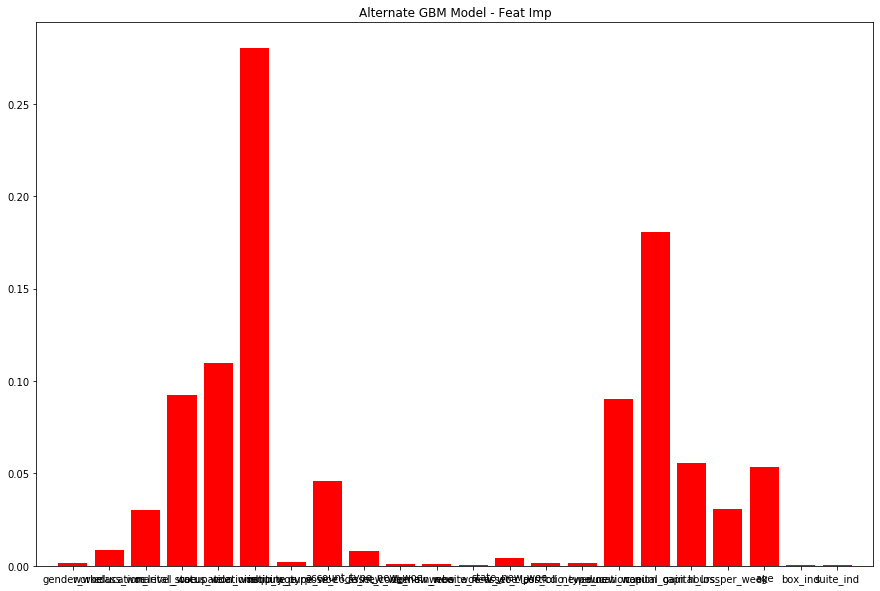

In [18]:
# Plotting Final Feature importances
plotfeatimp(X_train_ce.columns.values, gbmmodel_alt.feature_importances_, 'Alternate GBM Model - Feat Imp')

In [19]:
# Predictions on Train & Test Data
y_pred_train = gbmmodel_alt.predict(X_train_ce.values)
y_pred_test  = gbmmodel_alt.predict(X_test_ce.values)
y_pred_prob_train = np.array([x[1] for x in gbmmodel_alt.predict_proba(X_train_ce.values)])
y_pred_prob_test  = np.array([x[1] for x in gbmmodel_alt.predict_proba(X_test_ce.values)])

In [20]:
# Accuracy
accuracy_train_gbmalt = accuracy_score(y_pred_train,y_train.values)
accuracy_test_gbmalt = accuracy_score(y_pred_test,y_test.values)

In [21]:
# AUC & Confusion Matrix
fpr_train_gbmalt, tpr_train_gbmalt, _ = roc_curve(y_train.values, y_pred_prob_train)
fpr_test_gbmalt, tpr_test_gbmalt, _   = roc_curve(y_test.values, y_pred_prob_test)
auc_train_gbmalt = auc(fpr_train_gbmalt,tpr_train_gbmalt)
auc_test_gbmalt = auc(fpr_test_gbmalt,tpr_test_gbmalt)

In [22]:
# 88% Accuracy - Slightly better than the previous 2 versions (with only ~20 features)
print("Train accuracy {}".format(accuracy_train_gbmalt))
print("Test accuracy is {}".format(accuracy_test_gbmalt))

# AUC of 93%
print('Train AUC is {}'.format(auc_train_gbmalt))
print('Test AUC is {}'.format(auc_test_gbmalt))

Train accuracy 0.8868109303427578
Test accuracy is 0.8775705756615316
Train AUC is 0.9449185310934124
Test AUC is 0.9343406704122617


In [23]:
# Confusion Matrix if needed
confusion_test_gbmalt = confusion_matrix(y_test, y_pred_test)
confusion_test_gbmalt

array([[9573,  576],
       [1085, 2333]], dtype=int64)

<Figure size 432x288 with 0 Axes>

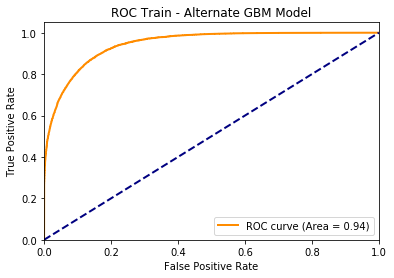

<Figure size 432x288 with 0 Axes>

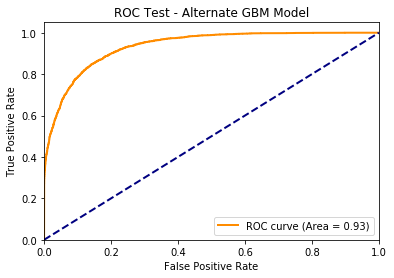

In [24]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
plotroc(fpr_train_gbmalt, tpr_train_gbmalt, 'ROC Train - Alternate GBM Model')
plotroc(fpr_test_gbmalt, tpr_test_gbmalt, 'ROC Test - Alternate GBM Model')

In [25]:
# KS table on Train data
ks_train = ks_table(y_train.values.flatten(), y_pred_prob_train.flatten(), n_groups=10, store=True)
ks_train

Max KS is 0.725


,Group,Min Score,Max Score,Observations,Cum-Obs(%),Events,Cum-Events(%),Non-Events,Cum-Non-Events(%),Pred Event Rate(%),Act Event Rate(%),KS-Score
,,,,,,,,,,,,
9,1,0.839015,0.999257,3166,0.1,3072,0.3944,94,0.0039,0.951965,0.970310,0.3905
8,2,0.534125,0.838824,3165,0.2,2194,0.6760,971,0.0446,0.682711,0.693207,0.6314
7,3,0.297990,0.534117,3166,0.3,1329,0.8466,1837,0.1216,0.408119,0.419773,0.7250
6,4,0.152482,0.297872,3165,0.4,730,0.9403,2435,0.2236,0.218553,0.230648,0.7167
5,5,0.072475,0.152369,3165,0.5,294,0.9780,2871,0.3439,0.107908,0.092891,0.6341
4,6,0.033794,0.072443,3166,0.6,114,0.9927,3052,0.4718,0.050537,0.036008,0.5209
3,7,0.016385,0.033787,3165,0.7,39,0.9977,3126,0.6028,0.024063,0.012322,0.3949
2,8,0.007199,0.016380,3166,0.8,12,0.9992,3154,0.7350,0.011359,0.003790,0.2642
1,9,0.002328,0.007192,3165,0.9,4,0.9997,3161,0.8674,0.004427,0.001264,0.1323


In [26]:
# KS table on Test data
ks_test = ks_table(y_test.values.flatten(), y_pred_prob_test.flatten(), n_groups=10, store=True)
ks_test

Max KS is 0.6991


,Group,Min Score,Max Score,Observations,Cum-Obs(%),Events,Cum-Events(%),Non-Events,Cum-Non-Events(%),Pred Event Rate(%),Act Event Rate(%),KS-Score
,,,,,,,,,,,,
9,1,0.848188,0.999339,1357,0.1,1310,0.3833,47,0.0046,0.954986,0.965365,0.3787
8,2,0.541084,0.848174,1357,0.2,909,0.6492,448,0.0488,0.687440,0.669860,0.6004
7,3,0.310293,0.541082,1356,0.3,594,0.8230,762,0.1239,0.416809,0.438053,0.6991
6,4,0.161424,0.310284,1357,0.4,326,0.9184,1031,0.2254,0.229530,0.240236,0.6930
5,5,0.078092,0.161392,1356,0.5,157,0.9643,1199,0.3436,0.114900,0.115782,0.6207
4,6,0.036013,0.078074,1357,0.6,75,0.9862,1282,0.4699,0.054313,0.055269,0.5163
3,7,0.017450,0.036011,1357,0.7,32,0.9956,1325,0.6005,0.025834,0.023581,0.3951
2,8,0.007480,0.017439,1356,0.8,10,0.9985,1346,0.7331,0.011978,0.007375,0.2654
1,9,0.002593,0.007471,1357,0.9,4,0.9997,1353,0.8664,0.004717,0.002948,0.1333


In [686]:
# Saving the final model using pickle
import pickle
with open(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\Alternate_GBM_Model.pkl', 'wb') as file:
    pickle.dump(gbmmodel_alt, file)

### Similarly, we can try any number of algorithms to see which one fits best on the data we have and go ahead with that.

# 5. Determining how much credit limit should be given to each application

In [ ]:
"""
To have algorithmic decisioning on how much credit limit should be granted to each approved application - 
we need data on what's the rough spend/revenue for each application in the next 3/6/12mo (or more). 

With this, we can frame a broader optimization problem on likelihood of default, xLoss, xRevenue etc 
and solve it to arrive at what's the optimal credit limit to assign for each application.

Using the P(default), we will now solve a very simple optimization problem using scipy.
"""

In [27]:
y_train_new = y_train.copy()
y_test_new = y_test.copy()
y_train_new['pred'] = y_pred_train
y_train_new['pred_prob'] = y_pred_prob_train
y_test_new['pred'] = y_pred_test
y_test_new['pred_prob'] = y_pred_prob_test
y = pd.concat((y_train_new, y_test_new), axis=0)
y.to_csv(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\pd_consolidated.csv')

In [45]:
import pandas as pd
import numpy as np
from scipy import optimize
y = pd.read_csv(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\pd_consolidated.csv', sep=',')

In [47]:
# Define the Number of variables
n = y.shape[0]
n

45222

In [49]:
# Define Spend (as % of the credit limit for simplicity) as a random array of the same size (assume that it is the output of a different spend model)
# Assume people's spend needs range from min $250 to $20K

sp = np.random.random_integers(low=250, high=20000, size=n)
sp

H:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(250, 20000 + 1) instead
  after removing the cwd from sys.path.


array([ 2650,  4574,  2199, ...,  2097, 14447, 15718])

In [50]:
# Assume that Interest Revenue is 15% of the spend (super-high but theoretically ok)
ir = 0.15

In [55]:
# Define probability of default (loss) from the model output we have
pdef = y['pred_prob'].values.flatten()
pdef

array([1.99012872e-01, 8.27994396e-03, 1.93015251e-04, ...,
       7.59441247e-04, 8.78483503e-01, 8.54589422e-02])

In [53]:
# Initial values for credit limit
cl_init = np.random.random_integers(low=1000, high=8000, size=n)
cl_init

H:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1000, 8000 + 1) instead
  


array([6917, 2516, 7583, ..., 1515, 3373, 4631])

In [56]:
# The profit (defined in negative)
def xprofit_neg(x):
    return np.dot(x,pdef) - ir * (np.maximum(x,sp).sum())

In [60]:
# Creating bounds for the optimization problem
bnd = []
for i in range(n):
    bnd.append((1000,8000))
bnd1 = tuple(bnd)

In [62]:
# checks
len(pdef) , len(cl_init) , len(sp) , len(bnd) , len(bnd1)

(45222, 45222, 45222, 45222, 45222)

In [63]:
result = optimize.minimize(fun=xprofit_neg, x0=cl_init, method='TNC', bounds=bnd1, tol=1e-10)
result.x

array([6916.92567717, 2516.        , 7636.86997105, ..., 1515.        ,
       3195.01005233, 4632.54364498])

In [74]:
optimized_cl = pd.DataFrame({'pd':pdef, 'model_pred_approved':np.concatenate((y_pred_train,y_pred_test), axis=0), 
                             'assumed_spend':sp, 'credit_limit_opt':result.x})
optimized_cl['credit_limit_approved'] = optimized_cl['model_pred_approved'] * optimized_cl['credit_limit_opt']
optimized_cl.set_index(y['user_id'])
optimized_cl.to_csv(r'C:\Users\abishek\Downloads\Pradeep\GitHub Files\optimized_cl.csv')
optimized_cl.head(5)

,pd,model_pred_approved,assumed_spend,credit_limit_opt,credit_limit_approved
0,0.199013,0,2650,6916.925677,0.000000
1,0.008280,0,4574,2516.000000,0.000000
2,0.000193,0,2199,7636.869971,0.000000
3,0.998018,1,5377,1836.843702,1836.843702
4,0.437684,0,1787,1429.118582,0.000000
